<a href="https://www.kaggle.com/code/sepidehghanadi/netflix-shows-eda?scriptVersionId=101237167" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:

import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt


import seaborn as sns
sns.set_style('whitegrid')
import plotly.graph_objects as go
import plotly.express as px

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

%matplotlib inline

/kaggle/input/netflix-shows/netflix_titles.csv




importing the csv file and finding out the dimensions of the dataframe:

In [2]:
netflix = pd.read_csv('/kaggle/input/netflix-shows/netflix_titles.csv')
netflix.shape

(8807, 12)

checking the attributes

In [3]:
netflix.dtypes

show_id         object
type            object
title           object
director        object
cast            object
country         object
date_added      object
release_year     int64
rating          object
duration        object
listed_in       object
description     object
dtype: object

In [4]:
netflix.head(5)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [5]:
netflix.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [6]:
netflix.isnull().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

**the most missing values are located in the director column**

<AxesSubplot:>

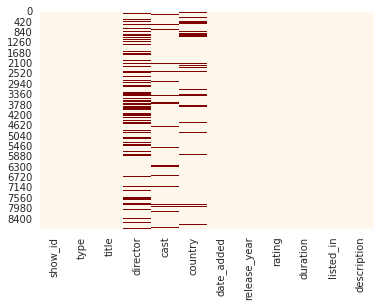

In [7]:
sns.heatmap(netflix.isnull(),cbar=False,cmap='OrRd')

In [8]:
netflix['country'].nunique()

748

748 countries are recorded in this data.

<AxesSubplot:xlabel='type', ylabel='count'>

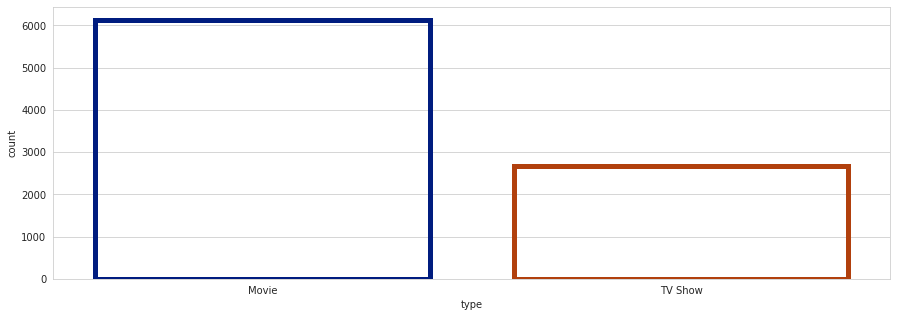

In [9]:
plt.figure(figsize = (15,5))
sns.countplot(x = "type",
              data = netflix,
              facecolor=(0, 0, 0, 0),
                   linewidth=5,
                   edgecolor=sns.color_palette("dark", 3))

In [10]:
from wordcloud import WordCloud
from collections import Counter

In [11]:
a=[]
for c in netflix.country.dropna():
    words=c.split(',')
    for w in words:
        if w in a:
            continue
        else:
            a.append(w.upper().strip())

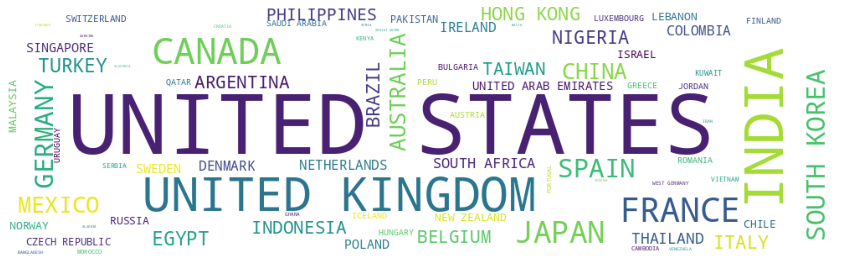

In [12]:
word_could_dict=Counter(a)
wordcloud = WordCloud(width = 1000, height = 300,background_color='white').generate_from_frequencies(word_could_dict)

plt.figure(figsize=(15,10))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()


In [13]:
netflix_us=netflix[netflix['country']=='United States'].dropna()
netflix_us


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
9,s10,Movie,The Starling,Theodore Melfi,"Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...",United States,"September 24, 2021",2021,PG-13,104 min,"Comedies, Dramas",A woman adjusting to life after a loss contend...
27,s28,Movie,Grown Ups,Dennis Dugan,"Adam Sandler, Kevin James, Chris Rock, David S...",United States,"September 20, 2021",2010,PG-13,103 min,Comedies,Mourning the loss of their beloved junior high...
28,s29,Movie,Dark Skies,Scott Stewart,"Keri Russell, Josh Hamilton, J.K. Simmons, Dak...",United States,"September 19, 2021",2013,PG-13,97 min,"Horror Movies, Sci-Fi & Fantasy",A family’s idyllic suburban life shatters when...
41,s42,Movie,Jaws,Steven Spielberg,"Roy Scheider, Robert Shaw, Richard Dreyfuss, L...",United States,"September 16, 2021",1975,PG,124 min,"Action & Adventure, Classic Movies, Dramas",When an insatiable great white shark terrorize...
42,s43,Movie,Jaws 2,Jeannot Szwarc,"Roy Scheider, Lorraine Gary, Murray Hamilton, ...",United States,"September 16, 2021",1978,PG,116 min,"Dramas, Horror Movies, Thrillers",Four years after the last deadly shark attacks...
...,...,...,...,...,...,...,...,...,...,...,...,...
8791,s8792,Movie,Young Adult,Jason Reitman,"Charlize Theron, Patton Oswalt, Patrick Wilson...",United States,"November 20, 2019",2011,R,94 min,"Comedies, Dramas, Independent Movies",When a divorced writer gets a letter from an o...
8793,s8794,Movie,"Yours, Mine and Ours",Raja Gosnell,"Dennis Quaid, Rene Russo, Sean Faris, Katija P...",United States,"November 20, 2019",2005,PG,88 min,"Children & Family Movies, Comedies",When a father of eight and a mother of 10 prep...
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019",2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...


In [14]:
figure = px.treemap(netflix_us, path=['country','director'],
                  color='director', hover_data=['director','title'],color_continuous_scale='Purples')
figure.show()

In [15]:
netflix_us['type'].value_counts()

Movie      1819
TV Show      27
Name: type, dtype: int64

Text(0.5, 1.0, 'Top Genres of US TV Shows')

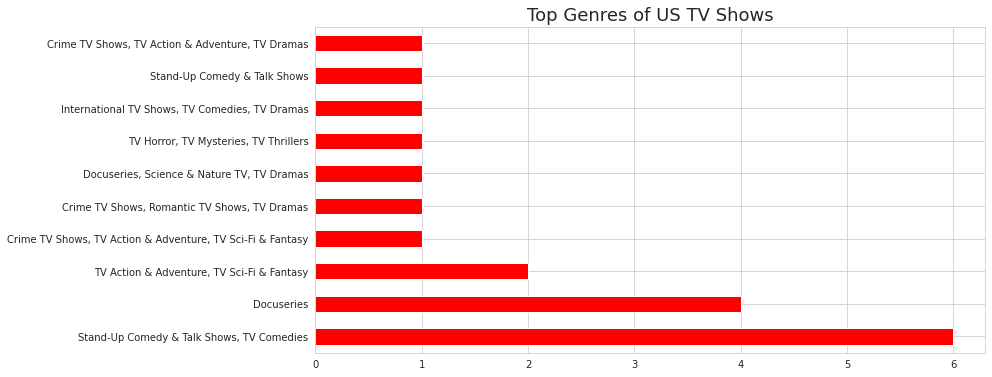

In [16]:
plt.figure(figsize=(12,6))
netflix_us[netflix_us["type"]=="TV Show"]["listed_in"].value_counts()[:10].plot(kind="barh",color="red")
plt.title("Top Genres of US TV Shows",size=18)

In [17]:
netflix = netflix.fillna('NULL')
netflix['year_added'] = netflix['date_added'].apply(lambda x :  x.split(',')[-1])

netflix['year_added'] = netflix['year_added'].apply(lambda x : x if x != 'NULL' else '2020')
netflix['year_added'] = netflix['year_added'].apply(int)
year_country = netflix.groupby('year_added')['country'].value_counts().reset_index(name='counts')

fig = px.choropleth(year_country, locations="country", color="counts", 
                    locationmode='country names',
                    animation_frame='year_added',
                    range_color=[0,200],
                    color_continuous_scale=px.colors.sequential.Burgyl
                   )

fig.update_layout(title='The activity of countries through the years')
fig.show()


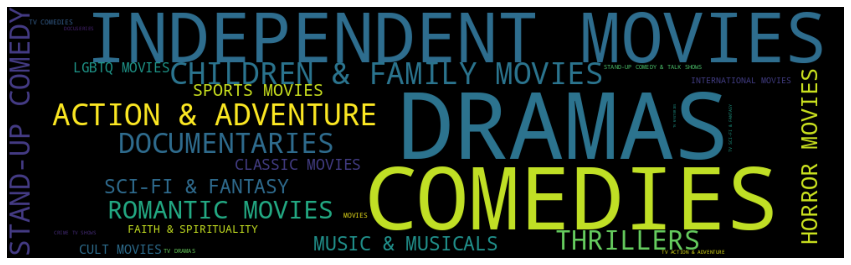

In [18]:
b=[]
for v in netflix_us.listed_in.dropna():
    words=v.split(',')
    for w in words:
        if w in b:
            continue
        else:
            b.append(w.upper().strip())
word_cloud_genre=Counter(b)
wordcloud = WordCloud(width = 1000, height = 300,background_color='black').generate_from_frequencies(word_cloud_genre)

plt.figure(figsize=(15,8))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

In [19]:
df = pd.DataFrame (b, columns = ['genres'])
df.value_counts()

genres                      
DRAMAS                          584
COMEDIES                        513
INDEPENDENT MOVIES              301
CHILDREN & FAMILY MOVIES        255
ACTION & ADVENTURE              248
DOCUMENTARIES                   213
STAND-UP COMEDY                 208
THRILLERS                       193
ROMANTIC MOVIES                 172
HORROR MOVIES                   142
MUSIC & MUSICALS                104
SCI-FI & FANTASY                103
SPORTS MOVIES                    72
CLASSIC MOVIES                   54
LGBTQ MOVIES                     43
CULT MOVIES                      38
FAITH & SPIRITUALITY             29
INTERNATIONAL MOVIES             17
MOVIES                           10
TV COMEDIES                      10
TV DRAMAS                         7
STAND-UP COMEDY & TALK SHOWS      7
DOCUSERIES                        5
CRIME TV SHOWS                    5
TV ACTION & ADVENTURE             5
TV SCI-FI & FANTASY               3
TV MYSTERIES                      2